# Final Project Helen Lykos
## FASHION MNIST


In [1]:
# Importing all the required libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


In [2]:
# Read the train and test dataset with pandas

Train = "fashion-mnist_train.csv"
Test  = "fashion-mnist_test.csv"

train_data = pd.read_csv(Train)
test_data = pd.read_csv(Test)

## EDA

Train data shape: (60000, 785)
Test data shape: (10000, 785)
Missing values in train data: 0
Missing values in test data: 0


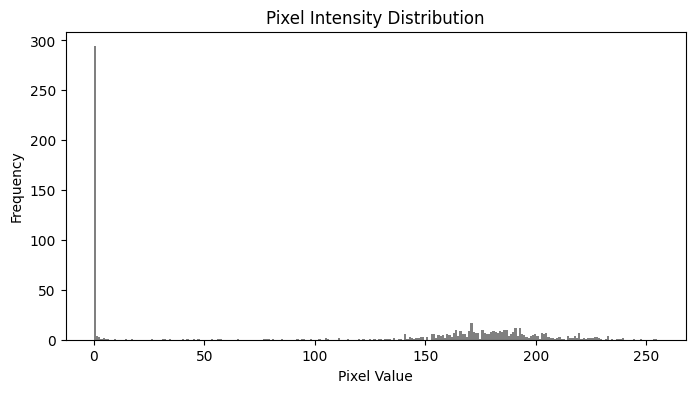

In [3]:
# Check the shape of the train and test data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Check for missing values
missing_values_train = train_data.isnull().sum().sum()
missing_values_test = test_data.isnull().sum().sum()
print("Missing values in train data:", missing_values_train)
print("Missing values in test data:", missing_values_test)

# Look for anomalies, outliers, or inconsistencies in the data

# Plot pixel intensity distribution for a random sample image
random_index = np.random.randint(0, train_data.shape[0])
pixel_values = train_data.iloc[random_index, 1:].values
plt.figure(figsize=(8, 4))
plt.hist(pixel_values, bins=256, color='gray')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

Sample images from the dataset:


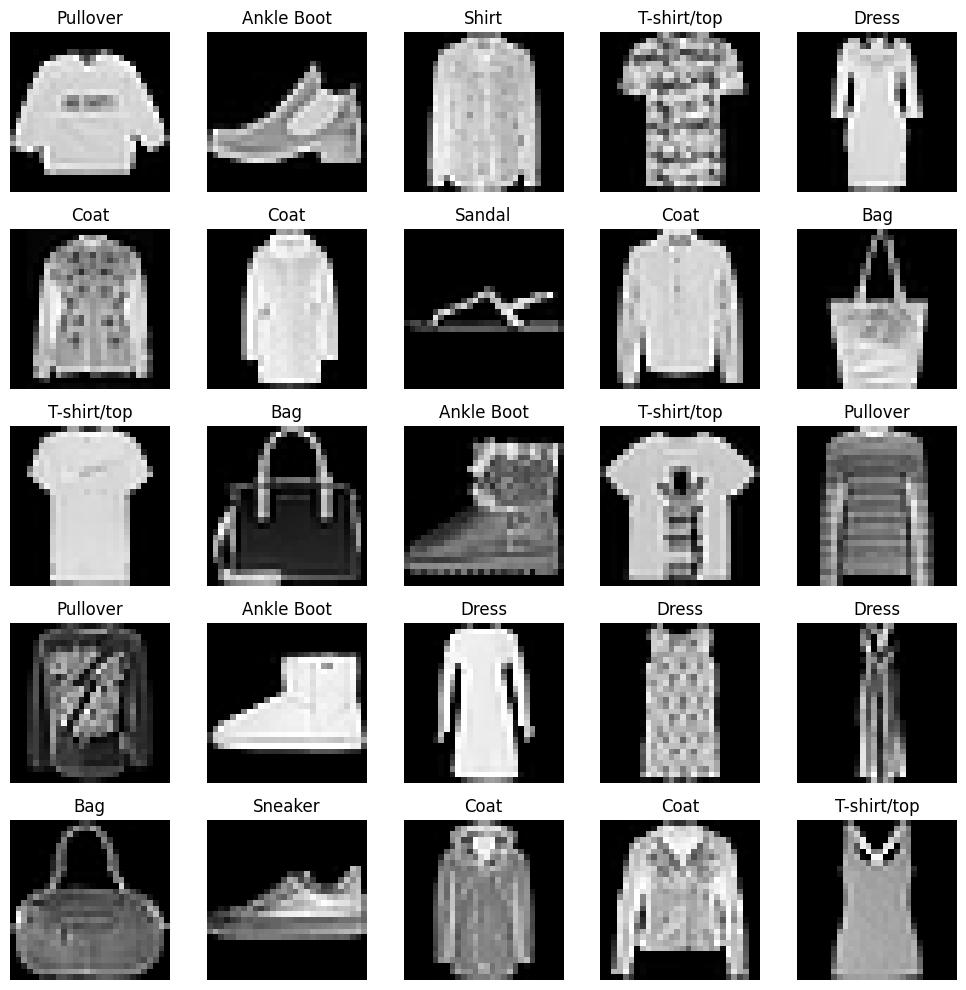

In [4]:
# We will create a dictionary for each type of label 


labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}


# Create a function to plot sample images from the dataset.

def plot_sample_images(data, num_samples=5):
    f, ax = plt.subplots(num_samples, num_samples, figsize=(10, 10))
    for i in range(num_samples):
        for j in range(num_samples):
            idx = i * num_samples + j
            label = data.loc[idx, "label"]
            image = data.loc[idx, data.columns != "label"].values.reshape(28, 28)
            ax[i, j].imshow(image, cmap="gray")
            ax[i, j].axis("off")
            ax[i, j].set_title(labels[label])
    plt.tight_layout()
    plt.show()

print("Sample images from the dataset:")
plot_sample_images(train_data)

In [5]:
# Creata a function to calculate the distribution of classes in the training data. 

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print(f"{label:<20s}:   {count} or {percent:.2f}%")

get_classes_distribution(train_data)

Pullover            :   6000 or 10.00%
Ankle Boot          :   6000 or 10.00%
Shirt               :   6000 or 10.00%
T-shirt/top         :   6000 or 10.00%
Dress               :   6000 or 10.00%
Coat                :   6000 or 10.00%
Sandal              :   6000 or 10.00%
Bag                 :   6000 or 10.00%
Sneaker             :   6000 or 10.00%
Trouser             :   6000 or 10.00%


In [6]:
def plot_label_per_class(data, title):
    f, ax = plt.subplots(figsize=(8, 8))
    # Generate the count plot using seaborn
    sns.countplot(y=data.label, order=data["label"].value_counts().index, palette="viridis")
    # Set the title, x-label, and y-label
    plt.title(title)
    plt.xlabel("Count")
    plt.ylabel("Class")

    # Add labels and count to the bars
    for p, label, count in zip(ax.patches, data["label"].value_counts().index, data["label"].value_counts()):
        ax.annotate(f"{labels[label]} ({count})", (p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center')

    plt.show()


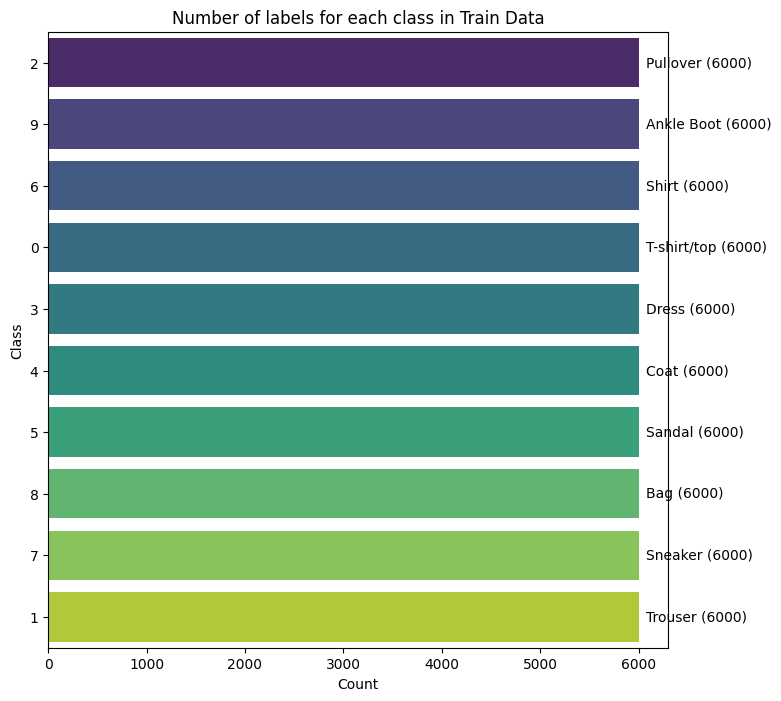

In [7]:

plot_label_per_class(train_data, "Number of labels for each class in Train Data")


In [8]:
#Distribution of classes in the test data. 

get_classes_distribution(test_data)

T-shirt/top         :   1000 or 10.00%
Trouser             :   1000 or 10.00%
Pullover            :   1000 or 10.00%
Dress               :   1000 or 10.00%
Bag                 :   1000 or 10.00%
Shirt               :   1000 or 10.00%
Sandal              :   1000 or 10.00%
Coat                :   1000 or 10.00%
Sneaker             :   1000 or 10.00%
Ankle Boot          :   1000 or 10.00%


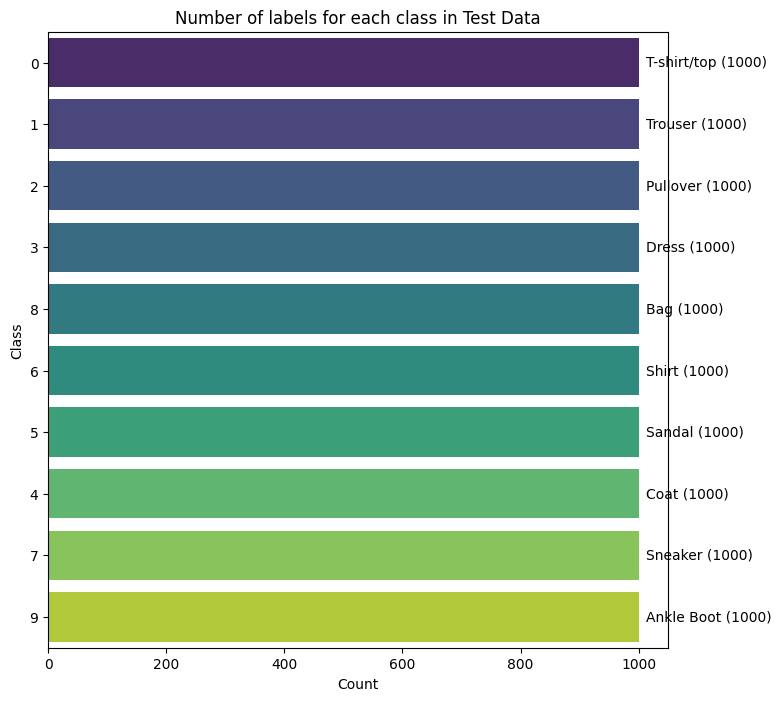

In [9]:
# We will visualize the distribution of classes in the test_data

plot_label_per_class(test_data,"Number of labels for each class in Test Data")

## Train Set Sample Images

In [10]:
# We will crate a function to collect and extract sample images and labels from the training data

def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(28,28)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


In [11]:
#We will create a functio to display a grid of sample images with their corresponding labels

def plot_sample_images(data_sample_images, data_sample_labels):
    num_samples = len(data_sample_images)
    # Adjust the number of rows based on the number of samples
    num_rows = (num_samples + 3) // 4  

    f, ax = plt.subplots(num_rows, 4, figsize=(10, 2.5 * num_rows))

    for i, img in enumerate(data_sample_images):
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].axis("off")
        ax[i // 4, i % 4].set_title(labels[data_sample_labels[i]])

    # Remove empty subplots if the number of samples is not divisible by 4
    for j in range(num_samples, num_rows * 4):
        ax[j // 4, j % 4].axis("off")

    plt.tight_layout()
    plt.show()



Total number of sample images to plot:  40


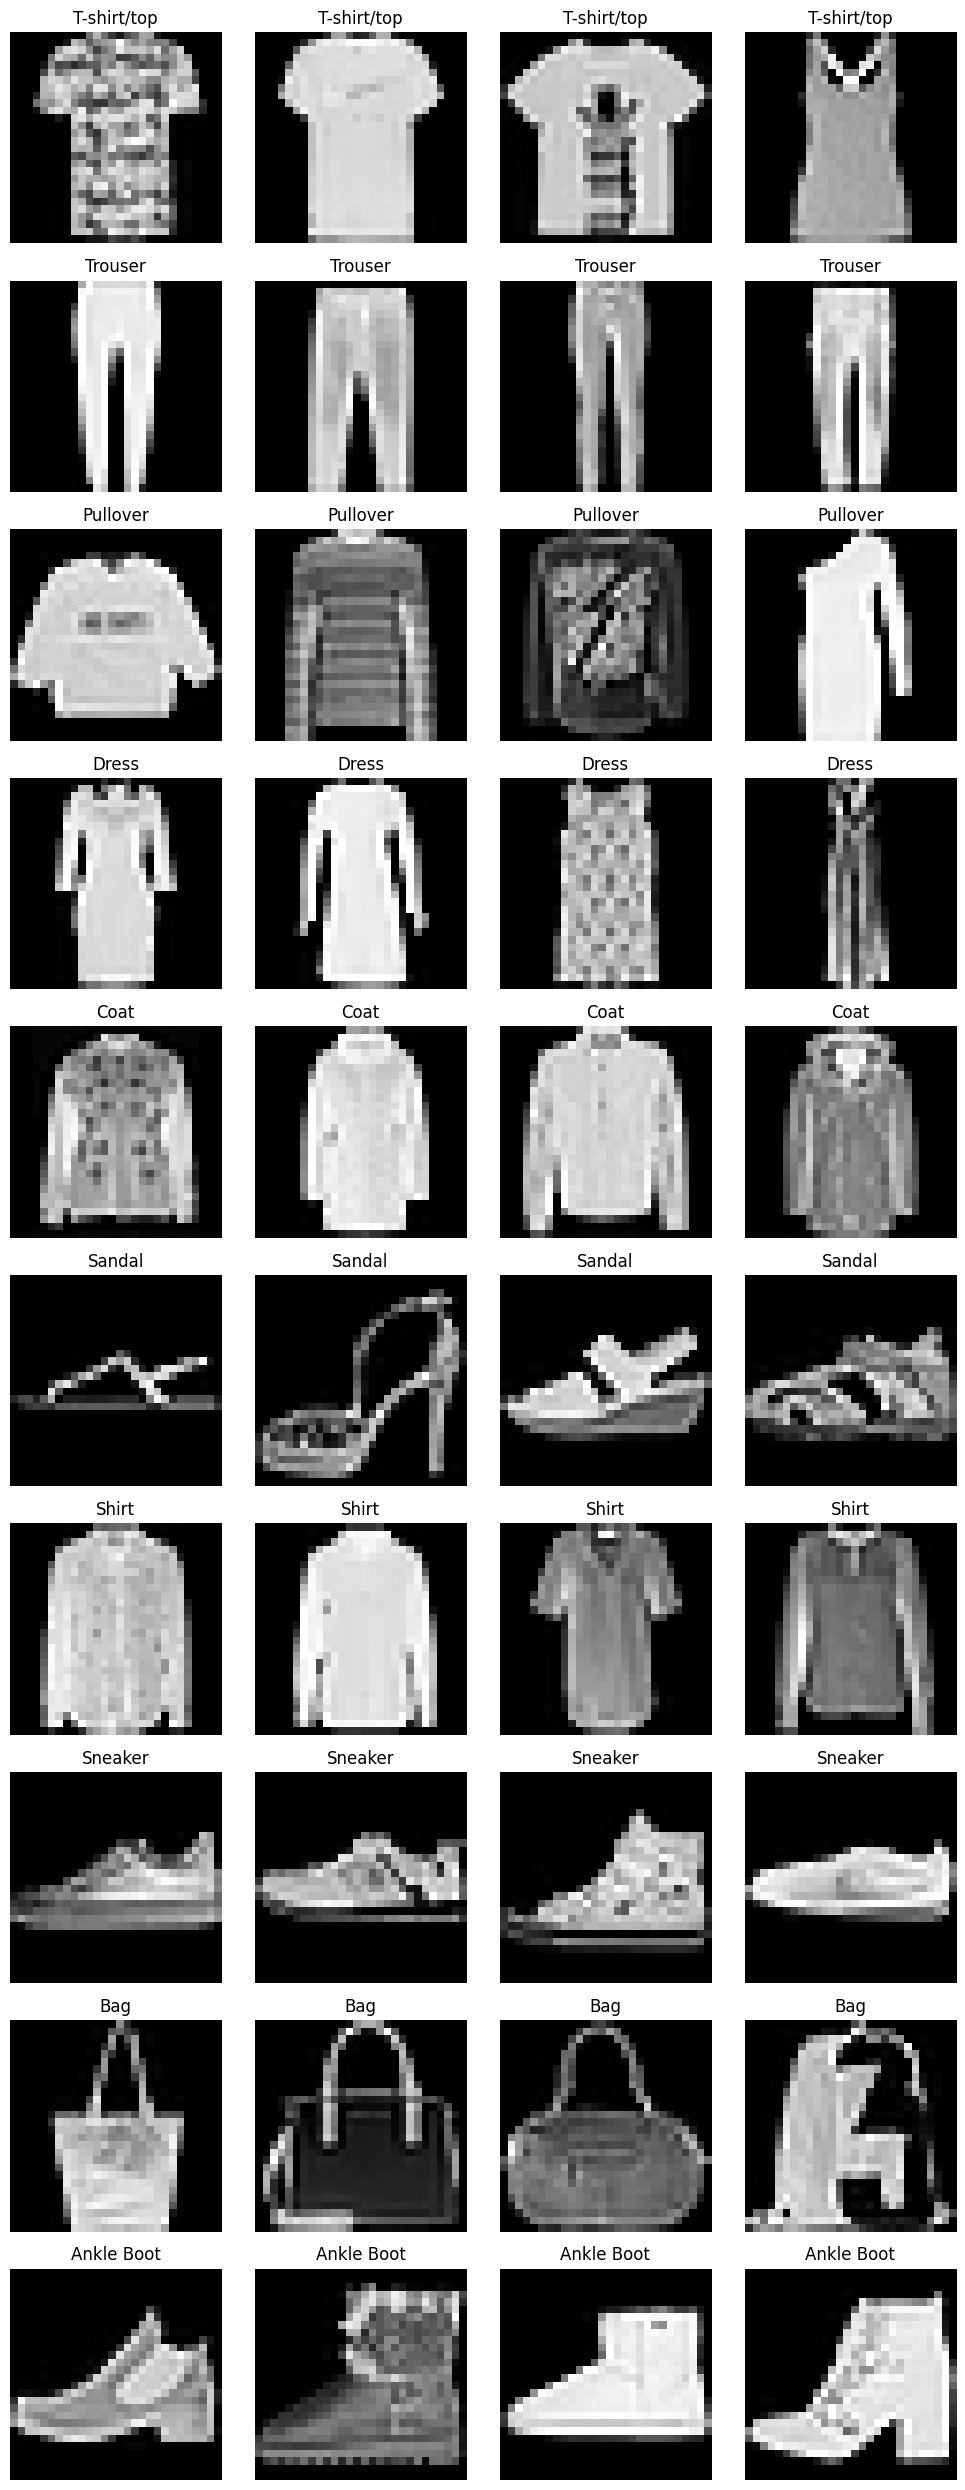

In [12]:
# We will call the function with test sample images and labels
test_sample_images, test_sample_labels = sample_images_data(test_data)

# We will call the function with train sample images and labels

plot_sample_images(train_sample_images, train_sample_labels)



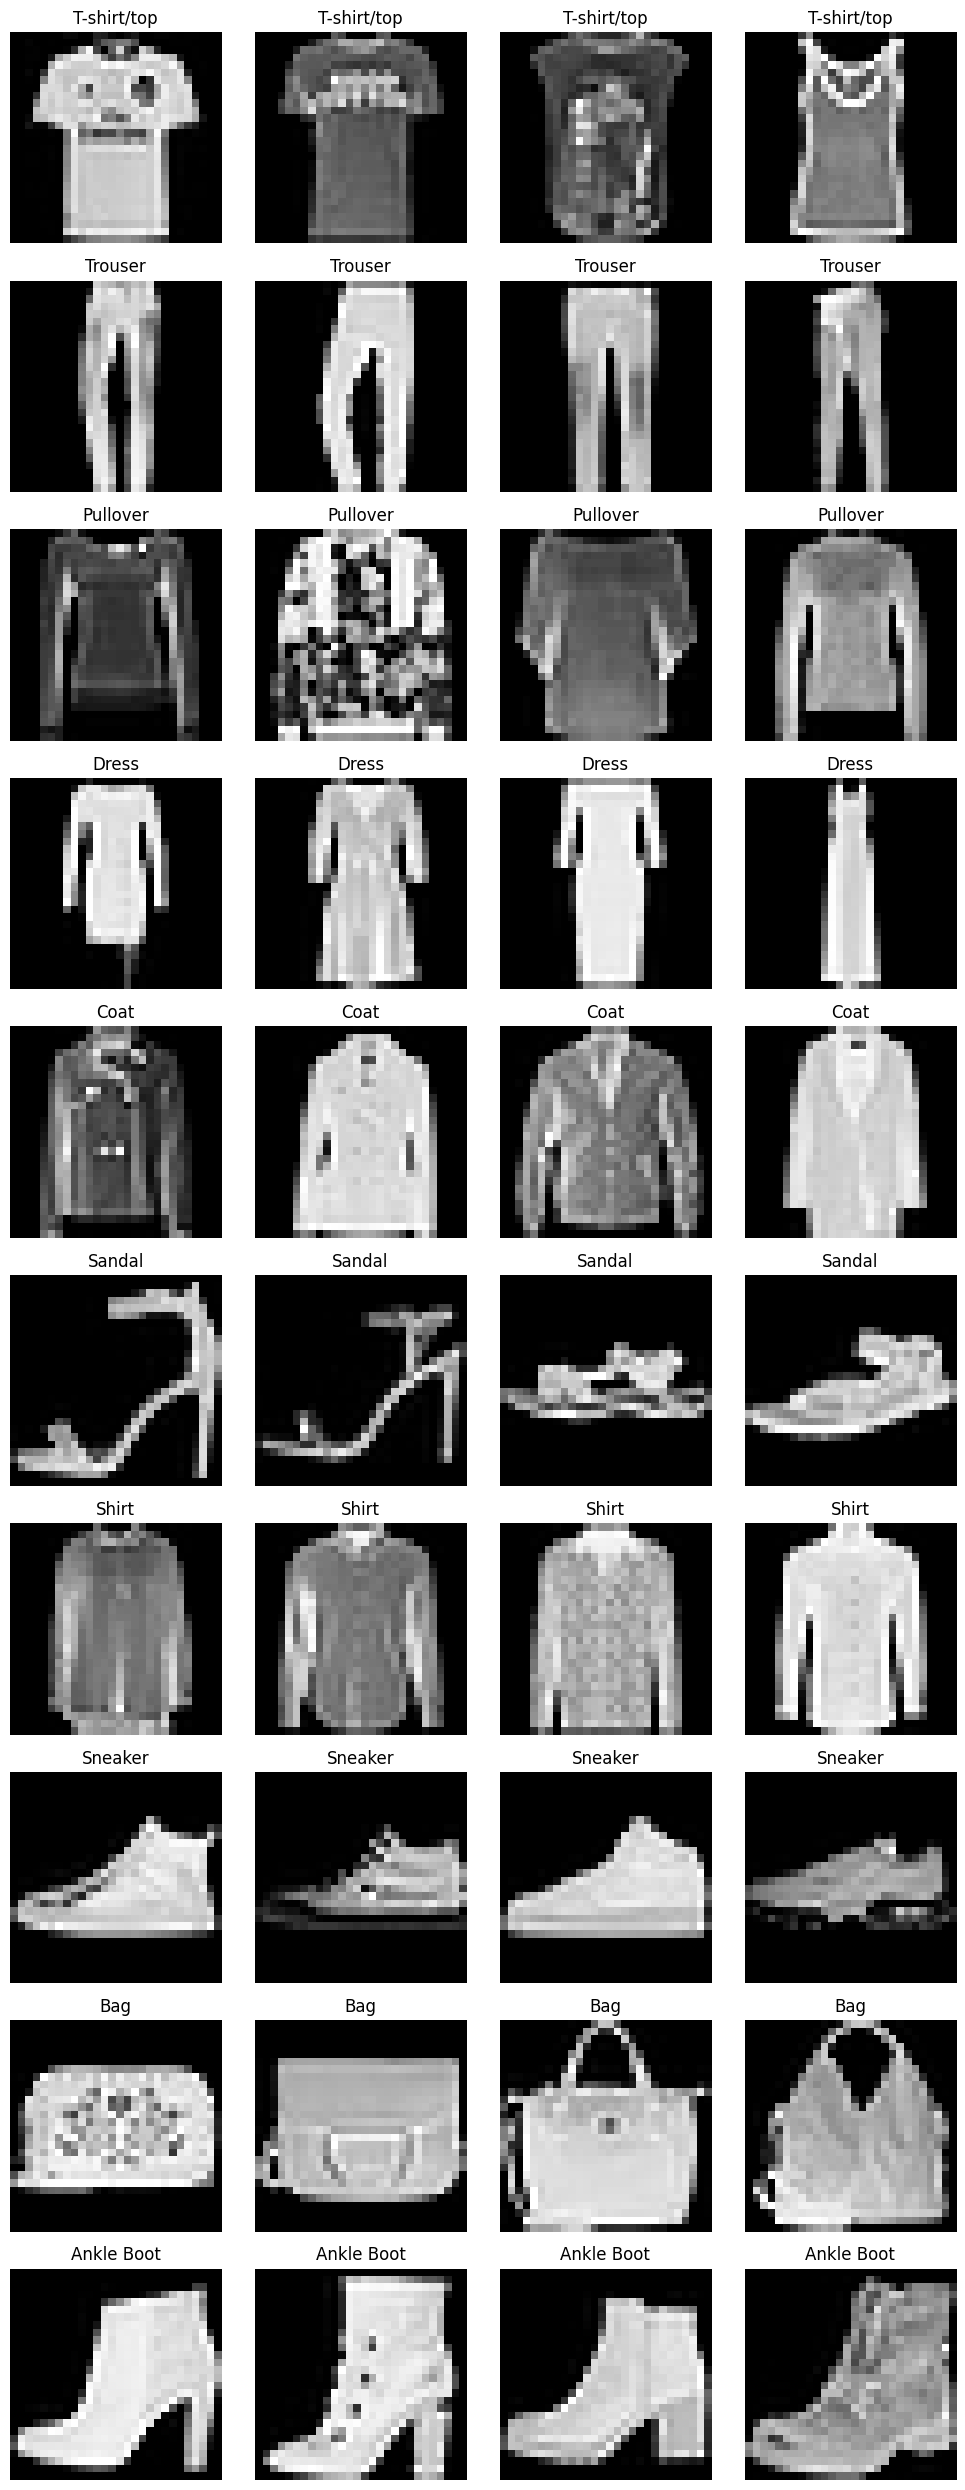

In [13]:
# Call the function with test sample images and labels

plot_sample_images(test_sample_images, test_sample_labels)


## Feature Engineering and Transformations

In [14]:
# Preprocess the raw dataset, preparing it for training machine learning models using TensorFlow and Keras.

def data_preprocessing(raw):
    out_y = to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

## Model Building


In [15]:
# Prepare the data

from keras.utils import to_categorical

X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [16]:
 # We will split the preprocessed training dataset into training and validation sets.
    
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=512)

In [17]:
#We will print the shape information of the preprocessed training, validation, and test datasets.

print(f"Fashion MNIST train -  rows: {X_train.shape[0]}, columns: {X_train.shape[1:4]}")
print(f"Fashion MNIST valid -  rows: {X_val.shape[0]}, columns: {X_val.shape[1:4]}")
print(f"Fashion MNIST test -  rows: {X_test.shape[0]}, columns: {X_test.shape[1:4]}")


Fashion MNIST train -  rows: 48000, columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000, columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000, columns: (28, 28, 1)


In [18]:
# We will create a function to  visualize the count of items for each class using a bar plot

def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    f, ax = plt.subplots(figsize=(8, 6))
    cmap = "viridis"  # Choose the colormap ("viridis" in this case)
    g = sns.barplot(y=ydf[0].value_counts().index, x=ydf[0].value_counts(), palette=cmap)
    g.set_title("Number of items for each class")
    g.set_xlabel("Count")
    g.set_ylabel("Class")

    for p, label in zip(g.patches, np.arange(0, 10)):
        width = p.get_width()
        g.annotate(labels[label], (width + 10, p.get_y() + p.get_height() / 2), va='center')

    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

In [19]:
# We will create a function to calculate and print the count and percentage of items for each class in the dataset.

def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

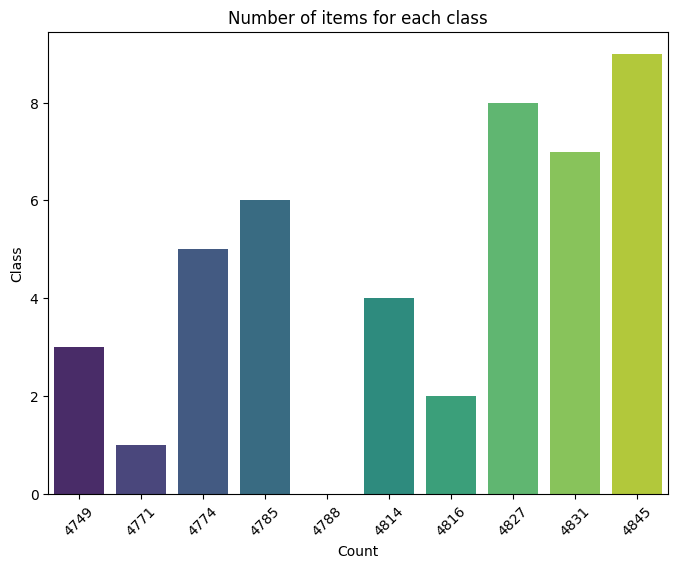

Ankle Boot          :   4845 or 10.09375%
Sneaker             :   4831 or 10.064583333333333%
Bag                 :   4827 or 10.05625%
Pullover            :   4816 or 10.033333333333333%
Coat                :   4814 or 10.029166666666667%
T-shirt/top         :   4788 or 9.975000000000001%
Shirt               :   4785 or 9.96875%
Sandal              :   4774 or 9.945833333333333%
Trouser             :   4771 or 9.939583333333333%
Dress               :   4749 or 9.893749999999999%


In [20]:
# For the train dataset
plot_count_per_class(np.argmax(y_train,axis=1))
get_count_per_class(np.argmax(y_train,axis=1))

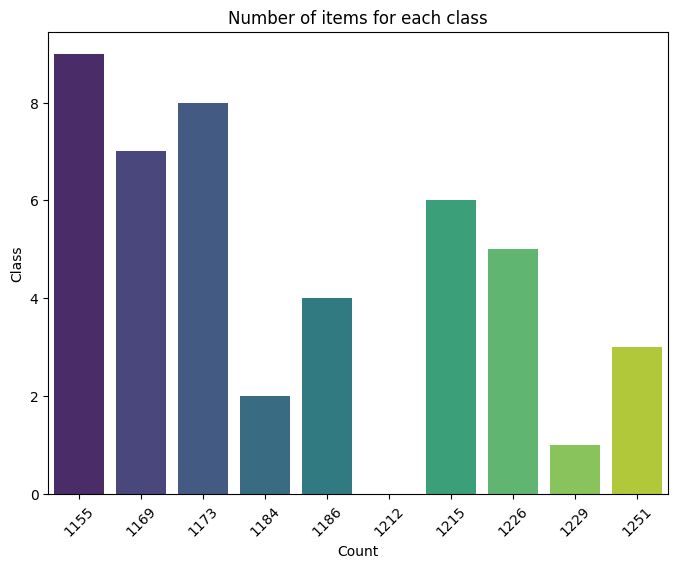

Dress               :   1251 or 10.424999999999999%
Trouser             :   1229 or 10.241666666666667%
Sandal              :   1226 or 10.216666666666667%
Shirt               :   1215 or 10.125%
T-shirt/top         :   1212 or 10.100000000000001%
Coat                :   1186 or 9.883333333333333%
Pullover            :   1184 or 9.866666666666667%
Bag                 :   1173 or 9.775%
Sneaker             :   1169 or 9.741666666666667%
Ankle Boot          :   1155 or 9.625%


In [21]:
# And for the validation dataset

plot_count_per_class(np.argmax(y_val,axis=1))
get_count_per_class(np.argmax(y_val,axis=1))

In [22]:
# As we  can see both the train and validation set are unbalanced with respect of distribution of classes. 

In [23]:
# Model 
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
# We will run the model for the Training dataset

train_model = model.fit(X_train, y_train,
                  batch_size=128,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 [==============================] - 17s 40ms/step - loss: 0.5272 - accuracy: 0.8064 - val_loss: 0.3776 - val_accuracy: 0.8603
Epoch 2/50
375/375 [==============================] - 14s 38ms/step - loss: 0.3411 - accuracy: 0.8771 - val_loss: 0.3369 - val_accuracy: 0.8804
Epoch 3/50
375/375 [==============================] - 15s 41ms/step - loss: 0.2895 - accuracy: 0.8951 - val_loss: 0.3252 - val_accuracy: 0.8838
Epoch 4/50
375/375 [==============================] - 14s 37ms/step - loss: 0.2574 - accuracy: 0.9068 - val_loss: 0.2843 - val_accuracy: 0.8998
Epoch 5/50
375/375 [==============================] - 16s 41ms/step - loss: 0.2329 - accuracy: 0.9164 - val_loss: 0.2687 - val_accuracy: 0.9005
Epoch 6/50
375/375 [==============================] - 18s 49ms/step - loss: 0.2081 - accuracy: 0.9242 - val_loss: 0.2575 - val_accuracy: 0.9072
Epoch 7/50
375/375 [==============================] - 14s 36ms/step - loss: 0.1869 - accuracy: 0.9315 - val_loss: 0.2645 - val_accuracy:

In [25]:
# We will calculate the test loss and accuracy

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7096983790397644
Test accuracy: 0.9153000116348267


The model's test accuracy is  0.915. We assessed the accuracy by comparing the predicted values with the actual labels in the test set. Now, let's examine the validation accuracy during the training process.

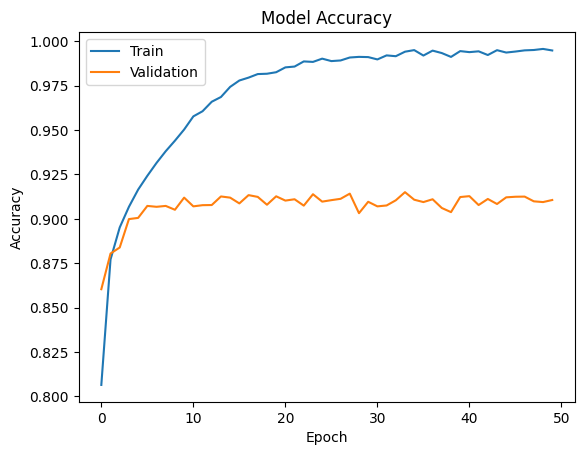

In [26]:
# We will plot the model's accuracy

plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


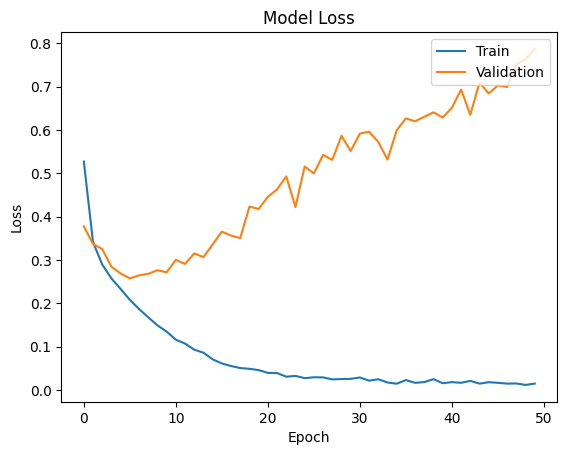

In [27]:
# We will plot the model's loss during training

plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [28]:
# Identify potential overfitting or underfitting scenarios

# Extract the training and validation accuracy values
train_accuracy = train_model.history['accuracy']
val_accuracy = train_model.history['val_accuracy']

# Extract the training and validation loss values
train_loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

# Print the values
print("Training Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])
print("Training Loss:", train_loss[-1])
print("Validation Loss:", val_loss[-1])


Training Accuracy: 0.9948124885559082
Validation Accuracy: 0.9105833172798157
Training Loss: 0.014748914167284966
Validation Loss: 0.7869294285774231


The validation accuracy does not show any further improvement after a few epochs, and the validation loss starts increasing instead of decreasing. These observations confirm our initial assumption that the model is overfitting the training data. To address this issue, we will enhance the model by incorporating Dropout layers, which can help mitigate overfitting.

NOTE: Training set is used to train our mode.
       Validation set is used to fine-tune our model and monitor the performance during training
       Test set is used to evaluate the model
       
       We used this methodology to make sure that the model is robust and performs well on the unseen data
       

##  We wil add Dropout layers to the model to help avoiding overfitting

In [29]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
 # Re-train the model

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

In [32]:
train_model = model.fit(X_train, y_train,
                  batch_size=128,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 [==============================] - 18s 47ms/step - loss: 0.7334 - accuracy: 0.7250 - val_loss: 0.4594 - val_accuracy: 0.8288
Epoch 2/50
375/375 [==============================] - 15s 40ms/step - loss: 0.4740 - accuracy: 0.8236 - val_loss: 0.3702 - val_accuracy: 0.8644
Epoch 3/50
375/375 [==============================] - 15s 40ms/step - loss: 0.4037 - accuracy: 0.8520 - val_loss: 0.3284 - val_accuracy: 0.8819
Epoch 4/50
375/375 [==============================] - 15s 40ms/step - loss: 0.3657 - accuracy: 0.8665 - val_loss: 0.3056 - val_accuracy: 0.8890
Epoch 5/50
375/375 [==============================] - 15s 40ms/step - loss: 0.3385 - accuracy: 0.8775 - val_loss: 0.2847 - val_accuracy: 0.8963
Epoch 6/50
375/375 [==============================] - 15s 40ms/step - loss: 0.3241 - accuracy: 0.8816 - val_loss: 0.2773 - val_accuracy: 0.8982
Epoch 7/50
375/375 [==============================] - 15s 40ms/step - loss: 0.3085 - accuracy: 0.8860 - val_loss: 0.2703 - val_accuracy:

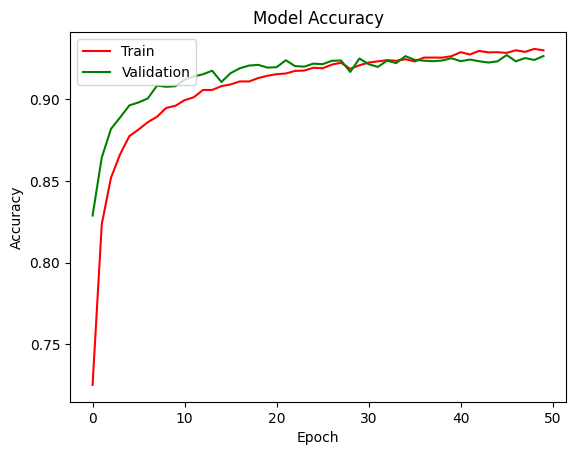

In [33]:
# We will plot the model's accuracy for the new model


plt.plot(train_model.history['accuracy'], color='red')
plt.plot(train_model.history['val_accuracy'],color='green')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


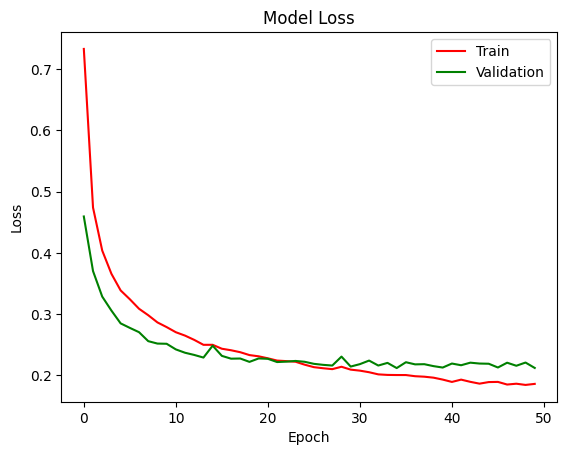

In [34]:
# We will plot the model's loss for the new model


plt.plot(train_model.history['loss'], color='red')
plt.plot(train_model.history['val_loss'], color='green')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

After applying  Dropout layers, the validation accuracy and validation loss are much better. 

## Re-evaluate the test prediction accuracy with the new model.

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20107907056808472
Test accuracy: 0.9273999929428101


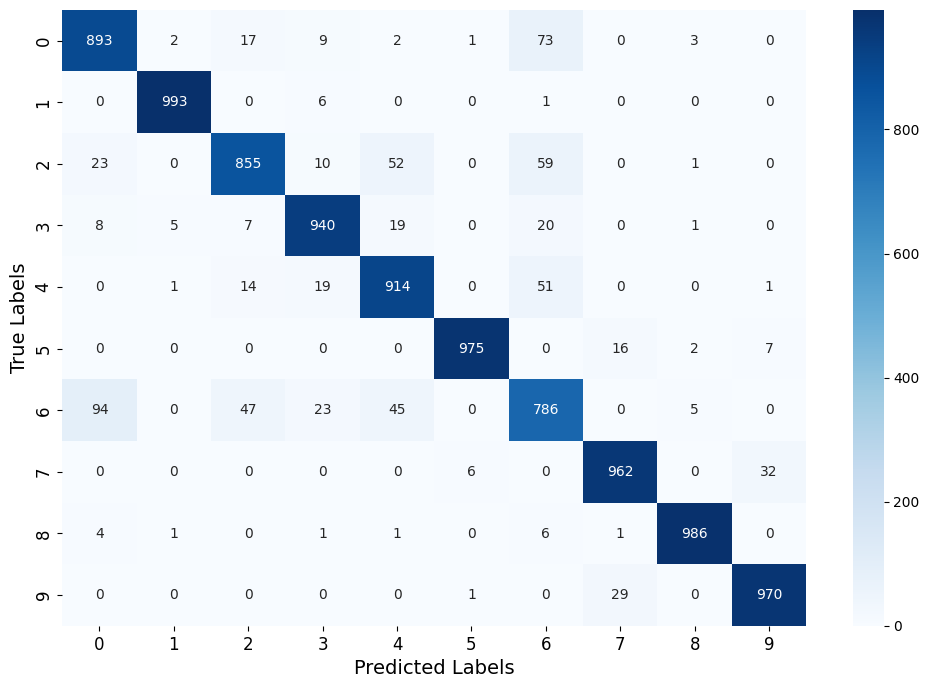

In [36]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Increase font size of labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


Furthermore, there was an improvement in the test accuracy as well. The test accuracy is now approximately 0.93, indicating that the model performs well on unseen data and generalizes effectively to new samples.

In [37]:
#We will predicted classes for the test data and retrieves the true labels for the test data
predicted_classes = model.predict_classes(X_test)
#We will get the indices to be plotted
y_true = test_data.iloc[:, 0]

C:\Users\elena\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:454: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [38]:
# We will analyze the predicted classes and true labels to identify correct and incorrect predictions.

p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [39]:
#We will print the number of correct and incorrect predicted classes based on the indices of correct and incorrect predictions

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9274
Incorrect predicted classes: 726


In [40]:
# We will generate a classification report to evaluate the performance of the model's predicted classes compared to the true labels.
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.87      0.89      0.88      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.91      0.85      0.88      1000
      Class 3 (Dress) :       0.93      0.94      0.94      1000
       Class 4 (Coat) :       0.88      0.91      0.90      1000
     Class 5 (Sandal) :       0.99      0.97      0.98      1000
      Class 6 (Shirt) :       0.79      0.79      0.79      1000
    Class 7 (Sneaker) :       0.95      0.96      0.96      1000
        Class 8 (Bag) :       0.99      0.99      0.99      1000
 Class 9 (Ankle Boot) :       0.96      0.97      0.97      1000

               accuracy                           0.93     10000
              macro avg       0.93      0.93      0.93     10000
           weighted avg       0.93      0.93      0.93     10000



### To further analyze the model's predictions, subsets of correctly classified and incorrectly classified images can be examined.

# Visualize classified images

## Correctly classified images

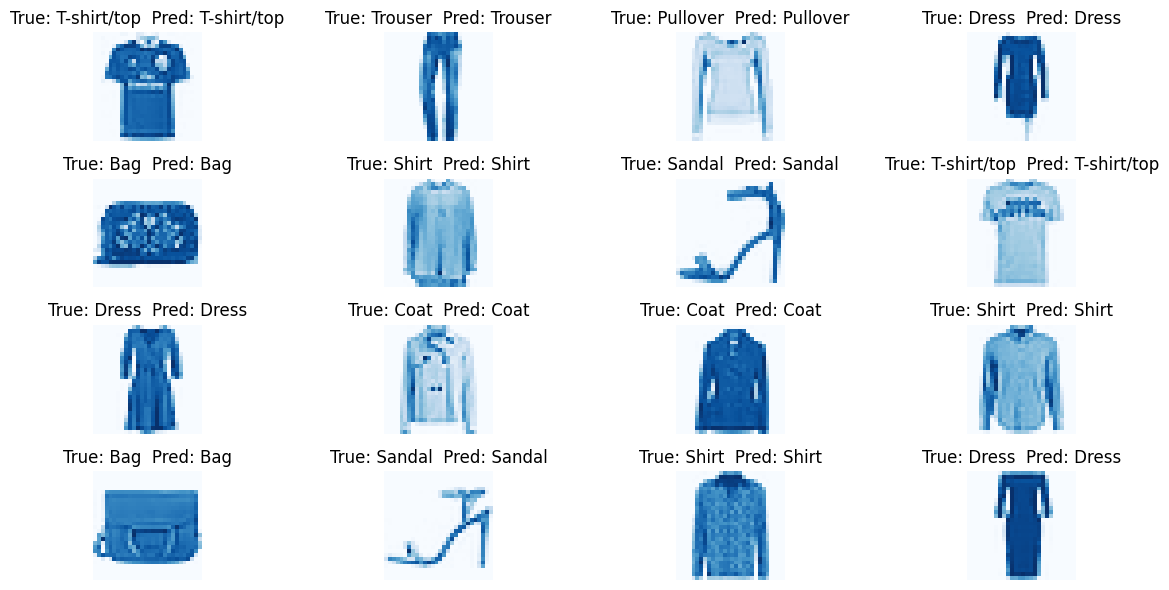

In [41]:
# plot a grid of sample images from the test dataset
    
def plot_images(data_index, cmap="Greys", figsize=(8, 8), interpolation='nearest'):
    # Plot the sample images now
    f, ax = plt.subplots(4, 4, figsize=figsize)

    for i, indx in enumerate(data_index[:16]):
        ax[i // 4, i % 4].imshow(X_test[indx].reshape(28, 28), cmap=cmap, interpolation=interpolation)
        ax[i // 4, i % 4].axis('off')
        ax[i // 4, i % 4].set_title("True: {}  Pred: {}".format(labels[y_true[indx]], labels[predicted_classes[indx]]))
    
    plt.tight_layout()  # Adjust the layout for better spacing
    plt.show()

plot_images(correct, cmap="Blues", figsize=(13, 6), interpolation='nearest')

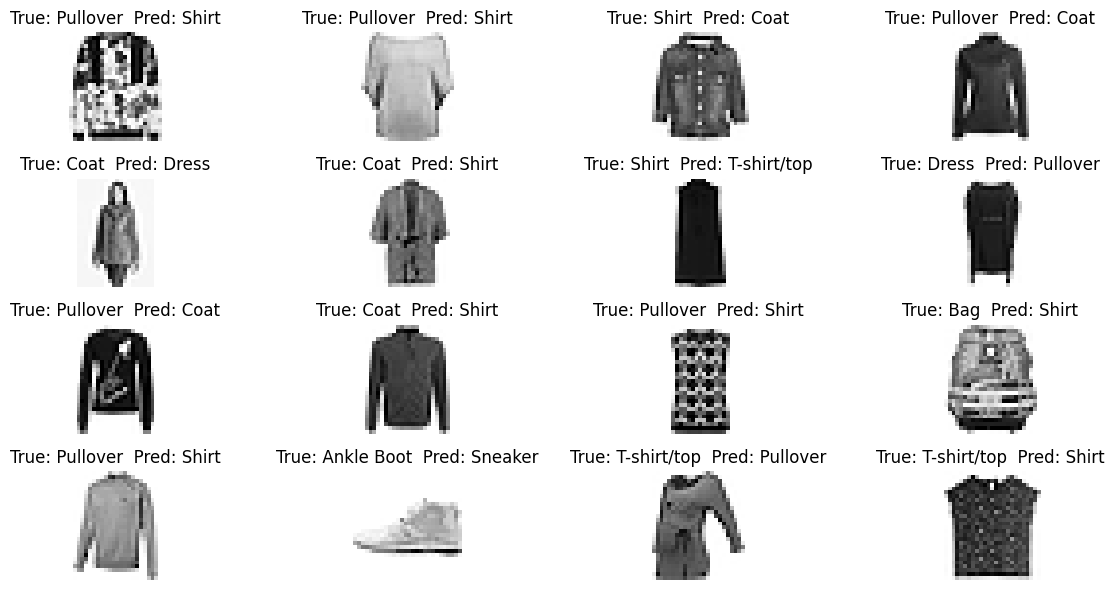

In [42]:
## Incorrectly classified images
plot_images(incorrect, cmap="Greys", figsize=(13, 6))